# 医疗保险行业被保人危险系数分析

## 挑战题目背景介绍

<img src="https://openedxvideosa.blob.core.chinacloudapi.cn/videos/MicroMOOC/%E8%8F%81%E8%8B%B1%E8%AE%A1%E5%88%92/image/DEMO/%E7%A4%BE%E4%BF%9D%E5%8D%A1.jpg" width= "460" height = "100" div align=left />   

<img src="https://openedxvideosa.blob.core.chinacloudapi.cn/videos/MicroMOOC/%E8%8F%81%E8%8B%B1%E8%AE%A1%E5%88%92/image/DEMO/%E5%8C%BB%E4%BF%9D%E7%AA%97%E5%8F%A3.jpg" width= "460" height = "100" div align=right /> 

<img src="https://openedxvideosa.blob.core.chinacloudapi.cn/videos/MicroMOOC/%E8%8F%81%E8%8B%B1%E8%AE%A1%E5%88%92/image/DEMO/%E5%90%B8%E7%83%9F%E6%9C%89%E5%AE%B3%E5%81%A5%E5%BA%B7.jpg" width= "460" height = "100" div align=left />   

<img src="https://openedxvideosa.blob.core.chinacloudapi.cn/videos/MicroMOOC/%E8%8F%81%E8%8B%B1%E8%AE%A1%E5%88%92/image/DEMO/BMI.jpg" width= "460" height = "100" div align=right /> 

授课老师可以根据国情，讲解一下我们中国的社保情况，然后再联系到个人医疗保险上去   
吸烟有害健康，并不是说说而已，我们可以从案例中挖掘出到底吸烟危害有多大   
太胖有害健康，健康减肥有益健康，同样可以从案例中挖掘出论据

### 认识数据集

数据集中包括如下的数据类型： id	age	sex	bmi	children	smoker	region	charges

- id => 用户ID   
- age => 年龄
- Sex => 性别（male或者female）
- bmi => 身体质量指数  
- smoker => 是否抽烟  
- children => 家里有孩子的个数  
- region => 居住的地理位置
- charges => 每年的个人健康保险理赔额（预测标签）  

## 挑战题目任务要求

在这个挑战中，你需要针对给定的数据集，完成以下的任务：
- 进行原始数据探索与分析，并且给出自己的见解
- 什么样子的人群每年花费的医疗费用较高？
- 哪些因素是影响健康的元凶？说明原因
- 对于我们自己而言，如何能够让自己更加健康，或者说，让自己远离医院？
- 对于医疗保险行业来讲，如何制定规则可以最大化收益？
- 对于医疗工作者而言，如何引导人们走上健康的生活轨道？


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

数据整体分析

In [3]:
insurance = pd.read_csv('insurance.csv')

In [6]:
insurance.head()

,id,age,sex,bmi,children,smoker,region,charges
0,15634602,19,female,27.900,0,yes,southwest,16884.924
1,15647311,18,male,33.770,1,no,southeast,1725.5523
2,15619304,28,male,33.000,3,no,southeast,4449.462
3,15701354,33,male,22.705,0,no,northwest,21984.47061
4,15737888,32,male,28.880,0,no,northwest,3866.8552


In [7]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 8 columns):
id          1340 non-null int64
age         1340 non-null object
sex         1340 non-null object
bmi         1332 non-null float64
children    1340 non-null int64
smoker      1340 non-null object
region      1340 non-null object
charges     1340 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 83.8+ KB


In [6]:
insurance['age'] = insurance['age'].astype('int64')

ValueError: invalid literal for int() with base 10: '?'

上面的代码为什么错了呢？

In [7]:
(insurance.astype(np.object) == '?').any()

id          False
age          True
sex         False
bmi         False
children    False
smoker      False
region      False
charges      True
dtype: bool

In [8]:
print("缺失的数据如下所示:\n \n", insurance.isnull().sum())

缺失的数据如下所示:
 
 id          0
age         0
sex         0
bmi         8
children    0
smoker      0
region      0
charges     0
dtype: int64


In [12]:
for col in insurance.columns:
    if insurance[col].dtype == object:
        count = 0
        count = [count + 1 for x in insurance[col] if x == '?']
        print(col + ' ' + str(sum(count)))

age 4
sex 0
smoker 0
region 0
charges 1


charges有缺失，这个怎么办？

age以及bmi又要如何处理?


In [13]:
#cols = ['age','charges']
for column in cols:
    insurance.loc[insurance[column] == '?', column] = np.nan
insurance.dropna(axis = 0, inplace = True)
insurance.shape# 移除带有缺失值的行，缺失值是用‘？’表示的

(1329, 8)

In [10]:
regions = ['southwest', 'southeast','northwest','northeast']
for r in regions:
    value = insurance[insurance.region == r].bmi.mean()
    insurance[insurance.region == r].bmi.fillna(value, inplace=True)

In [11]:
insurance['age'] = insurance['age'].astype('int64')
insurance['charges'] = insurance['charges'].astype('float64')

ValueError: invalid literal for int() with base 10: '?'

In [12]:
insurance[insurance.charges > 60000]

TypeError: '>' not supported between instances of 'str' and 'int'

In [13]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1340 non-null   int64  
 1   age       1340 non-null   object 
 2   sex       1340 non-null   object 
 3   bmi       1332 non-null   float64
 4   children  1340 non-null   int64  
 5   smoker    1340 non-null   object 
 6   region    1340 non-null   object 
 7   charges   1340 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 83.9+ KB


In [14]:
# missing_value = insurance[(insurance.age == 23.0) & (insurance.sex == "male") & (insurance. == "male")].Fare.mean()
# insurance.Fare.fillna(missing_value, inplace=True)

In [15]:
print(insurance.shape)
print(insurance.id.unique().shape)

(1340, 8)
(1338,)


数据集中有重复值

In [16]:
insurance.drop_duplicates(subset = 'id', keep = 'first', inplace = True)
print(insurance.shape)
print(insurance.id.unique().shape)

(1338, 8)
(1338,)


In [17]:
insurance.describe(include=object)

,age,sex,smoker,region,charges
count,1338,1338,1338,1338,1338
unique,48,2,2,4,1337
top,18,male,no,southeast,1639.5631
freq,69,676,1064,364,2


In [18]:
insurance.describe()

,id,bmi,children
count,1.338000e+03,1330.000000,1338.000000
mean,1.569075e+07,30.668173,1.094918
std,7.191330e+04,6.093709,1.205493
min,1.556570e+07,15.960000,0.000000
25%,1.562816e+07,26.315000,0.000000
50%,1.568981e+07,30.380000,1.000000
75%,1.575077e+07,34.693750,2.000000
max,1.581536e+07,53.130000,5.000000


In [19]:
from sklearn.preprocessing import LabelEncoder

#性别
le = LabelEncoder()
le.fit(insurance.sex.drop_duplicates()) 
insurance.sex = le.transform(insurance.sex)

# 是否抽烟
le.fit(insurance.smoker.drop_duplicates()) 
insurance.smoker = le.transform(insurance.smoker)

# 地区
le.fit(insurance.region.drop_duplicates()) 
insurance.region = le.transform(insurance.region)

除了上述办法，还有没有其他的方式来操作？

In [20]:
insurance.head()

,id,age,sex,bmi,children,smoker,region,charges
0,15634602,19,0,27.900,0,1,3,16884.924
1,15647311,18,1,33.770,1,0,2,1725.5523
2,15619304,28,1,33.000,3,0,2,4449.462
3,15701354,33,1,22.705,0,0,1,21984.47061
4,15737888,32,1,28.880,0,0,1,3866.8552


End of day1（Data preprocessing）   

THANK YOU!

Beginning of day2   
WELCOME!

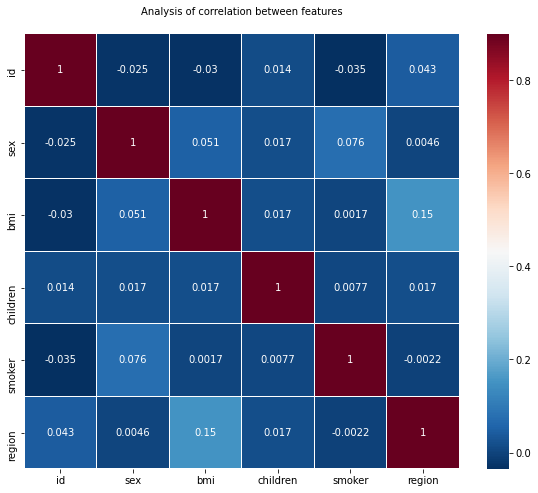

In [21]:
plt.subplots(figsize = (10,8))
sns.heatmap(insurance.corr(), 
            annot=True,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Analysis of correlation between features", y = 1.03,fontsize = 10);

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=1, figsize=(15, 8))
index = 0
axs = axs.flatten() # 将axs展开
for k,v in insurance.items():
    sns.boxplot(y=k, data=insurance, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
sns.distplot(a=insurance['charges'],kde=True)

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(insurance[(insurance.smoker == 1)]["charges"],color='r',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(insurance[(insurance.smoker == 0)]['charges'],color='c',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(insurance["bmi"], color = 'm')

啊哈，非常漂亮的正态分布！从图像上看，平均的bmi指数大概是30的样子，为什么呢？同学们可以去课后研究一下~~~

首先，让我们看看BMI大于30小于30的患者的成本分布。

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(insurance[(insurance.bmi >= 30)]['charges'], color = 'r')

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(insurance[(insurance.bmi < 30)]['charges'], color = 'b')

体重指数在30以上的患者在治疗上花费更多！

In [ ]:
sns.countplot(x="children", palette="RdYlGn", data=insurance)

数据集中大多数人还没有生孩子，并且，我们发现有的家庭有5个孩子，幸福的一家~~

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  insurance[(insurance.sex == 0)] , orient="h")

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  insurance[(insurance.sex == 1)] , orient="h", palette = 'rainbow')

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(insurance["age"], color = 'g')

In [ ]:
sns.countplot(x="smoker",hue = 'sex', palette="rainbow", data=insurance[(insurance.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = insurance[(insurance.age == 18)] , orient="h", palette = 'pink')

In [ ]:
g= sns.jointplot(x="age", y="charges", data = insurance[(insurance.smoker == 0)],kind="kde")
g.set_axis_labels("age", "charge")

In [ ]:
g = sns.jointplot(x="age", y="charges", data = insurance[(insurance.smoker == 0)],kind="scatter", color="b")

In [ ]:
g = sns.jointplot(x="age", y="charges", data = insurance[(insurance.smoker == 1)],kind="kde", color="c")

In [ ]:
g = sns.jointplot(x="age", y="charges", data = insurance[(insurance.smoker == 1)],kind="scatter", color="b")

End of day2（Data Visualization）   

THANK YOU!

Beginning of day3   
WELCOME!

In [ ]:
#sns.catplot(x="smoker", kind="count",hue = 'sex', palette="spring", data=insurance)

In [ ]:
g = sns.countplot("smoker", hue ='sex',data=insurance,palette="spring")
plt.xticks([0,1],['no','yes'])
plt.legend(['female','male'])

In [ ]:
#sns.catplot(x="sex", y="charges", hue="smoker",kind="violin", data=insurance)
g = sns.violinplot(x="sex", y="charges", hue="smoker", data=insurance, split=True)
handles, labels = g.get_legend_handles_labels()
plt.xticks([0,1],['female','male'])
plt.legend(handles,['no','yes'],title='smoker')

In [ ]:
sns.violinplot(x="smoker", y="charges", hue="sex", data=insurance, split=True)
handles, labels = g.get_legend_handles_labels()
plt.xticks([0,1],['no','yes'])
plt.legend(handles,['female','male'],title='sex')

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  insurance[(insurance.sex == 0)] , orient="h")

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  insurance[(insurance.sex == 1)] , orient="h", palette = 'rainbow')

In [ ]:
sns.lmplot(x="age", y="charges", hue="smoker", data=insurance, palette = 'inferno_r', size = 7)

在不吸烟者中，治疗费用随着年龄的增长而增加。这是有道理的。

在吸烟的人身上，我们看不到这种依赖。我认为，这不仅是在是否吸烟，而且还在于数据集的特点。吸烟对治疗费用的影响如此之大。

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=insurance,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

In [ ]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance, palette = 'magma', size = 8)

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', size='age',data=insurance)

In [ ]:
sns.countplot(x="smoker",palette="rainbow",hue = "sex",data=insurance[(insurance.children > 0)])
ax.set_title('Smokers and non-smokers who have childrens')

恩，有孩子的家庭，抽烟的父母还是较少，这个可能跟父母的健康意识有关系吧

In [ ]:
g = sns.FacetGrid(insurance, col="children", hue="smoker")
g.map(plt.scatter, "bmi", "charges", edgecolor="w").add_legend()

In [ ]:
sns.violinplot(x="region", y="charges", hue="sex", data=insurance, split=True)

End of day3（Data Visualization）   

THANK YOU!

Beginning of day4    
WELCOME!

不同区域的charges的区分度并不是很大

1. 从数据集中来看，有相当一部分女性是抽烟的，而且总量跟男性相差没有太大
2. 不抽烟的男人和女人，保险理赔金的数目是没有什么差别的，但是抽烟的男人的理赔金在总体上是要比女性高的。
    - 可能是因为男女不同体质原因   
    - 也有可能是女性抽烟的频率没有男性大   
    - 又或许女性抽的烟比男性抽的烟有害物少一些   
    
  这些都是我们的猜测，因为没有上下文语境，我们需要更多的特征进行我们的论断。
3. 不管男性与女性，只有是抽烟的，每年的保险理赔金 都要远远高于不抽烟的人群，所以说，吸烟真的有害健康啊，大家要戒烟！戒烟！戒烟！！！
4. 令我最担心的是，18岁左右的青少年，很大一部分都有抽烟的习惯，并且由于抽烟，导致身体健康情况不容乐观，每年的健康保险理赔金远远高于不抽烟的
5. 从可视化的展现，我们可以发现，随着年龄的增加，保险理赔金也是在增加的，这个在不抽烟的人群中是正相关的，也是很符合我们的自然规律的。但是，抽烟的人群这个规律就不是那么严格，因为抽烟的人群同一个年龄段，理赔金是不尽相同的，比较分散。
6. 对于抽烟的人群来说，bmi指数对于健康确实影响很大，尤其是超过30的人群，很明显有个阶跃的过程，健康保险理赔金的数额要高于bmi低于30的人群，并且，随着bmi的增大，每年的健康理赔金也都在增加，但是不抽烟的人群，bmi与健康的关系就不是那么明显，所以说过度肥胖的人群更要注意烟草的摄入量！
7. 有孩子的家庭，特别是有超过4个孩子的家庭，几乎没有父母抽烟，可能是父母意识到了孩子健康的重要性吧，拒绝一手二手三手烟！

最终我们得到特征相关性比价大的是：
- 数值特征
    - age, bmi
- 类别特征
    - smoker

End of day4（Data Insight）   

THANK YOU!